# Nuclei Detect  demo

This notebook can be used to predict cells and nuclei given one has the sufficient model and data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import random
#import requests
from io import BytesIO
from PIL import Image
import numpy as np
import os

Those are the relevant imports for the detection model

In [6]:
from maskrcnn_benchmark.config import cfg
pylab.rcParams['figure.figsize'] = 20, 12

# importing the prediction class
from predictor import NUCLEIdemo

The NUCLEIdemo class can load the config file and does the image prediction.

In [10]:
configuration_file = "../configs/nuclei_1gpu_nonorm_offline.yaml"

# update the config options with the config file
cfg.merge_from_file(configuration_file)

# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

# change dimensions of test images
cfg.merge_from_list(['INPUT.MAX_SIZE_TEST','2049'])

# change number of classes
cfg.merge_from_list(['MODEL.ROI_BOX_HEAD.NUM_CLASSES','4'])

# change normalization, here model was not normalized
cfg.merge_from_list(['INPUT.PIXEL_MEAN', [0., 0., 0.]])

# define model to use here
cfg.merge_from_list(['MODEL.WEIGHT', '/home/maxsen/DEEPL/models_new/20190313_offline_augment/model_final.pth'])

# define how many objects can be identified per image
cfg.merge_from_list(['TEST.DETECTIONS_PER_IMG', '120'])

# show the configuration
#print(cfg)

Change the confidence threshold.

In [11]:
# load image
def load(path):
    pil_image = Image.open(path).convert("RGB")
    #print(pil_image)
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

# show image alongside the result and save if necessary
def imshow(img, result, save_path=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches = 'tight')
        plt.show()
    else:
        plt.show()
        
def imshow_single(result, save_path=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

Let's define a few helper functions for loading images from a URL

In [12]:
nuclei_detect = NUCLEIdemo(
    cfg,
    min_image_size=1024,
    confidence_threshold=0.7,
)

### Define the image paths and show the results

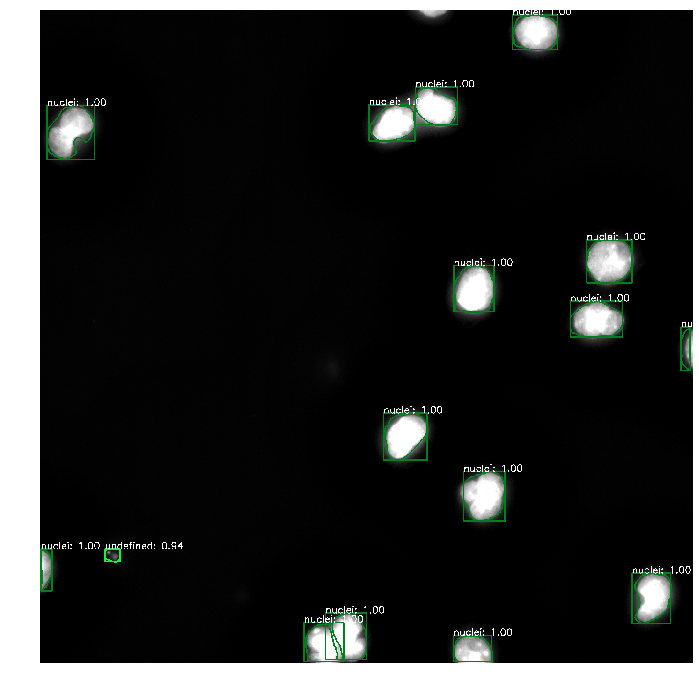

{'bbox': tensor([[   2.6439, 1690.4438,   37.0974, 1821.1860],
        [2010.9833,  993.7726, 2040.0929, 1130.3395],
        [ 895.3083, 1891.6885, 1024.8228, 2037.1860],
        [1663.0466,  913.2740, 1826.4482, 1026.4009],
        [1328.4883, 1447.5232, 1458.6113, 1603.5906],
        [1297.3163,  801.5615, 1423.1654,  945.9196],
        [1856.7609, 1766.3629, 1977.8263, 1924.0529],
        [1481.5082,   15.1354, 1623.0297,  124.7622],
        [1077.6313, 1264.4130, 1214.3865, 1411.7833],
        [1296.1860, 1961.5275, 1416.7837, 2043.4003],
        [1031.9545,  297.4100, 1176.7958,  410.2318],
        [1177.3740,  241.9920, 1309.2974,  359.9482],
        [1714.3727,  720.4067, 1857.7379,  855.2899],
        [ 828.5716, 1920.3096,  953.9603, 2043.0354],
        [  22.2276,  299.2933,  171.3574,  469.2264],
        [ 203.2084, 1690.8535,  250.3238, 1729.7275]]), 'size': (2048, 2048), 'mode': 'xyxy', 'extra_fields': {'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]), 's

In [41]:
#img_path = '../../ms2/ssss/'
#img_path = '/data/proj/smFISH/Students/Max_Senftleben/files/data/20190309_aug_pop/ss/'
img_path = '/data/proj/smFISH/Simone/test_intron/AMEXP20181106/AMEXP20181106_hyb1/test_run_20181123_AMEXP20181106_hyb1_filtered_png/test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'

# random image is taken from the image path
random_img = random.choice(os.listdir(img_path))
image = load(img_path + random_img)

# results are computed
result, predictions = nuclei_detect.run_on_opencv_image(np.add(image, 0))

imshow_single(result)
img = Image.fromarray(result, 'RGB')
img.save('test.png')

print(vars(predictions))


16
Area of object is 7.773715678615791 µm**2.


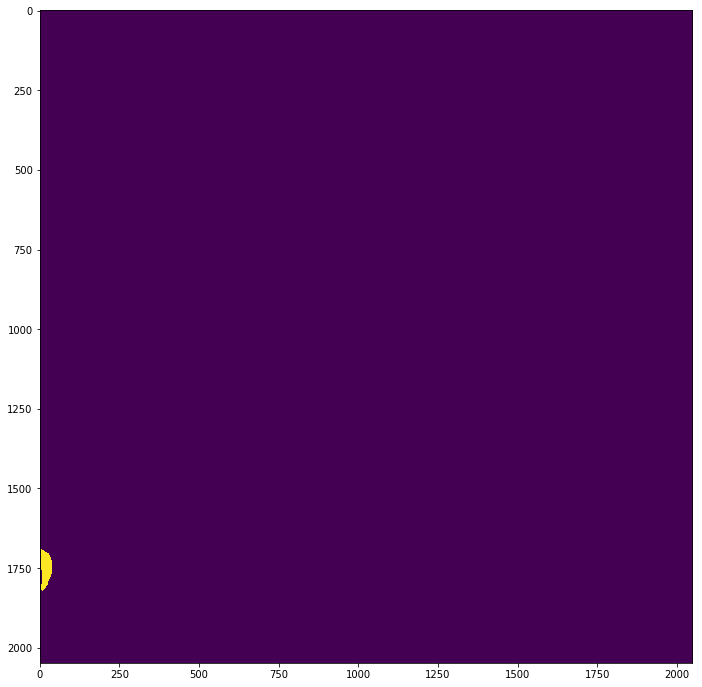

Area of object is 7.580300000453339 µm**2.


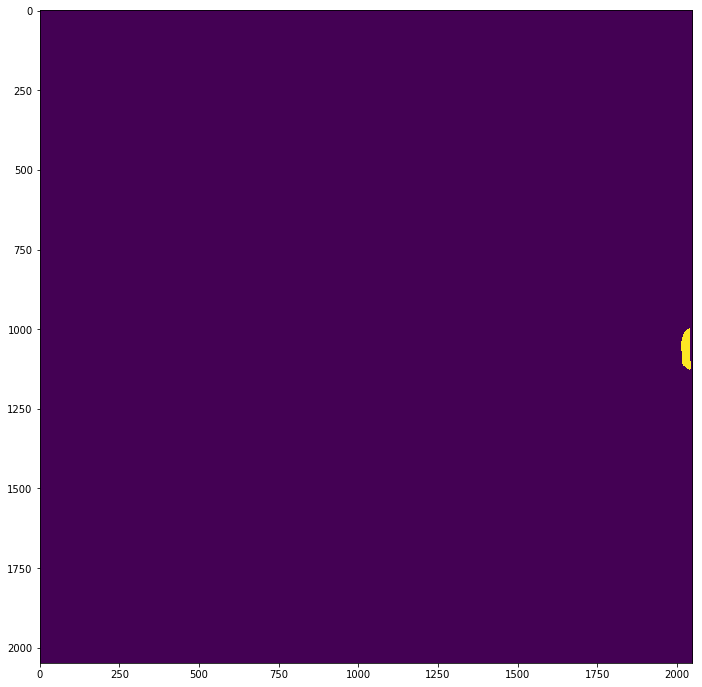

Area of object is 32.638395047288 µm**2.


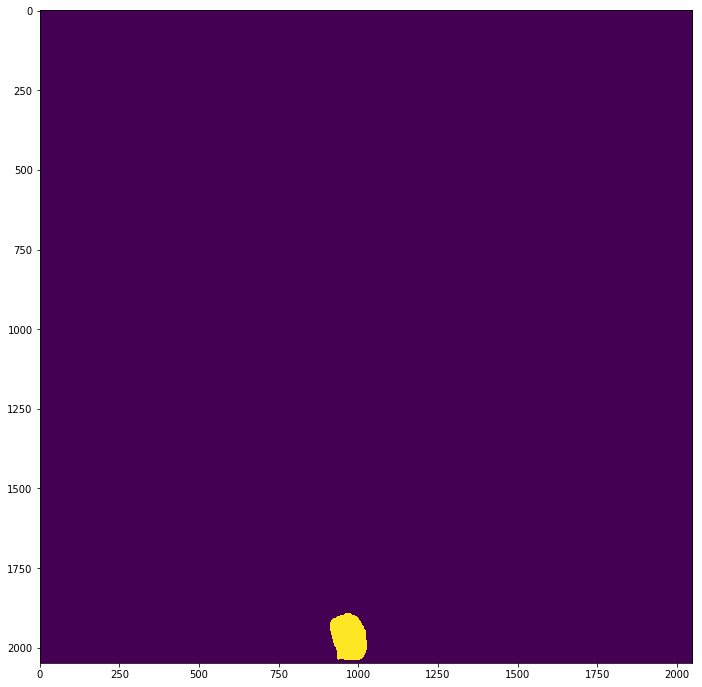

Area of object is 34.76024427152179 µm**2.


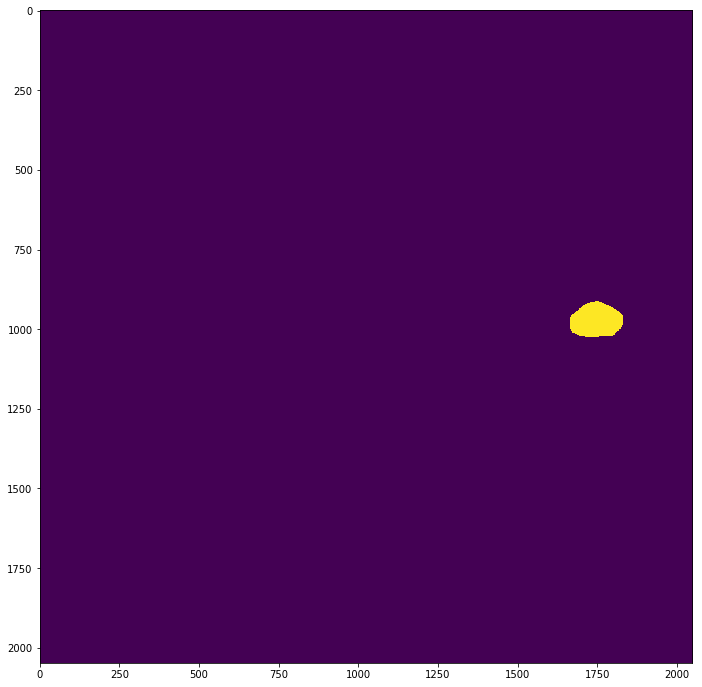

Area of object is 38.63901813238363 µm**2.


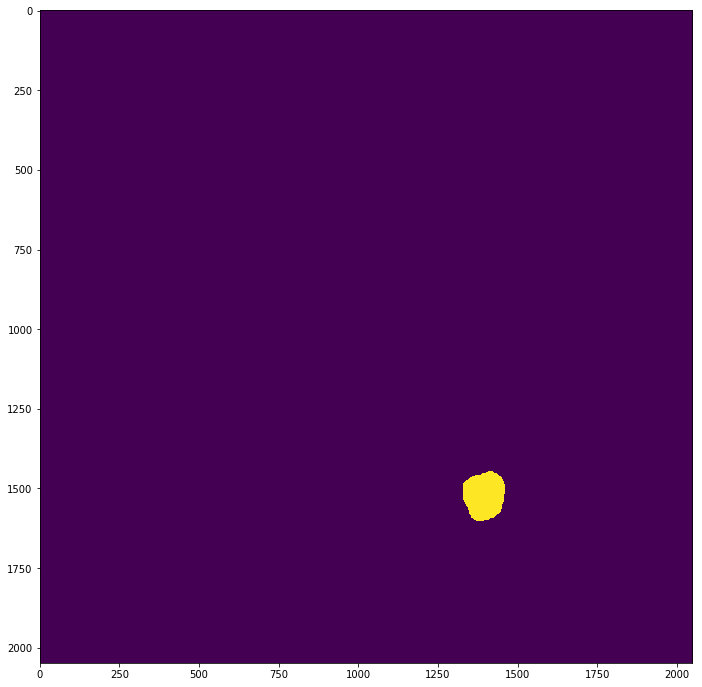

Area of object is 37.17842196551711 µm**2.


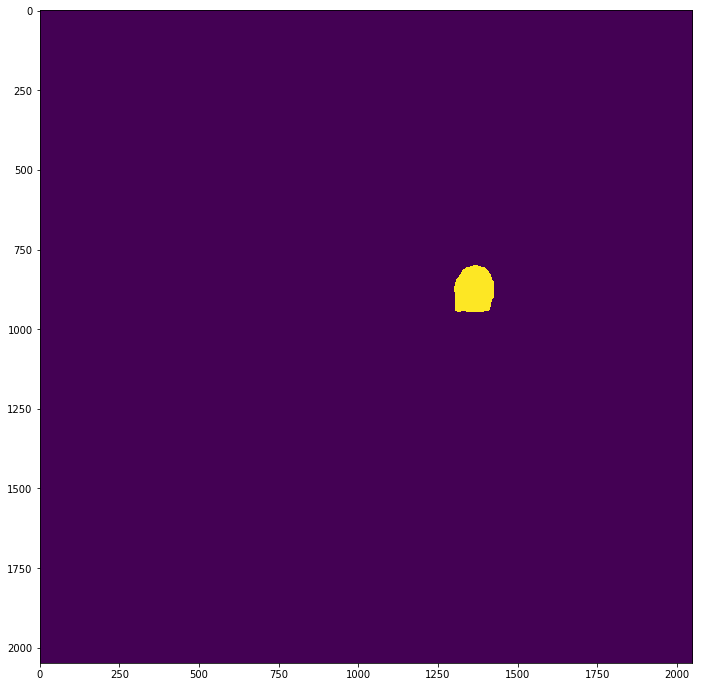

Area of object is 33.358379029169505 µm**2.


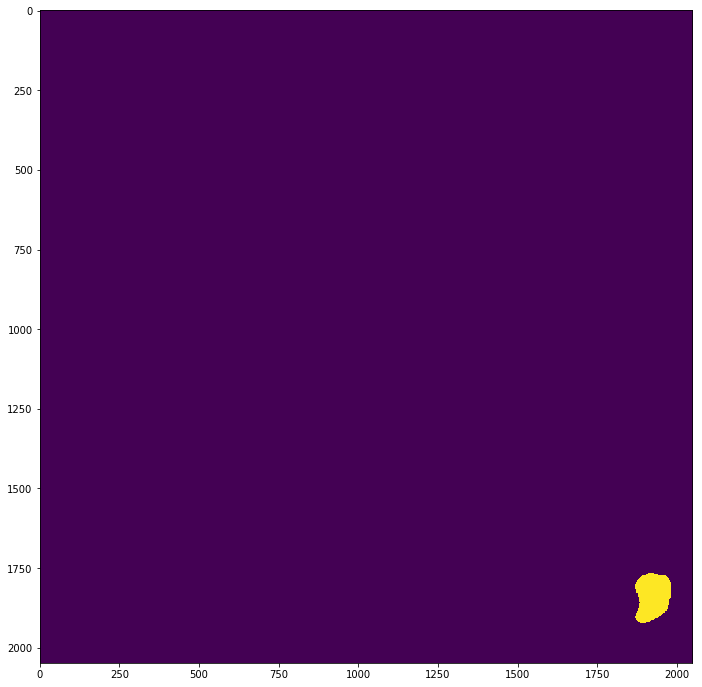

Area of object is 31.680976441847974 µm**2.


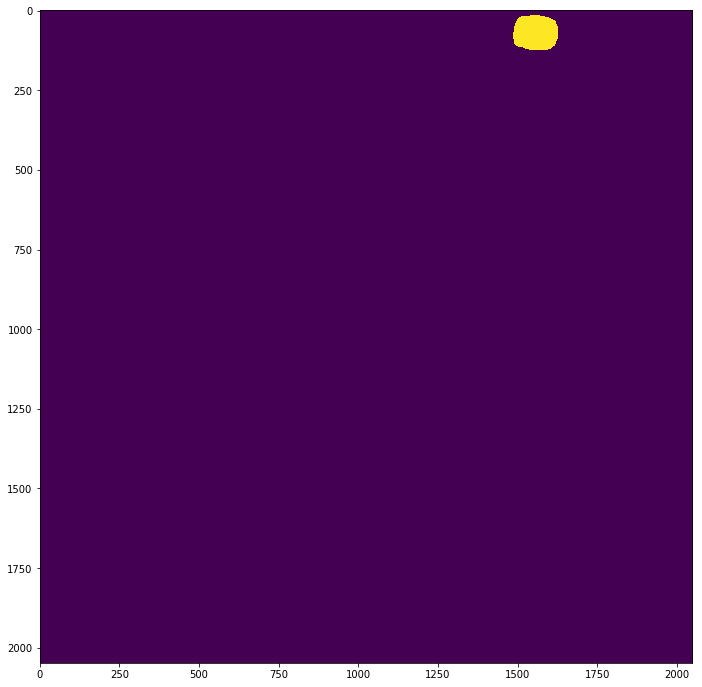

Area of object is 34.31851843522867 µm**2.


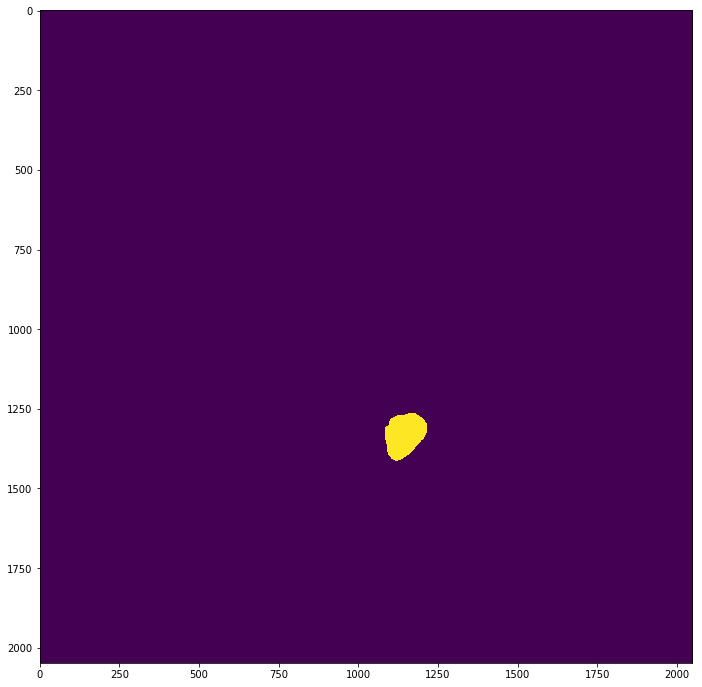

Area of object is 20.184645669761615 µm**2.


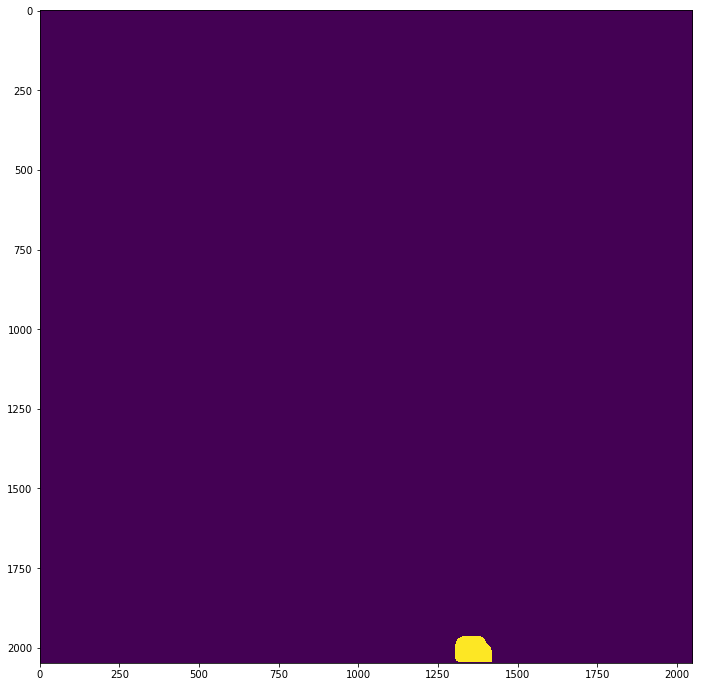

Area of object is 29.42132950741272 µm**2.


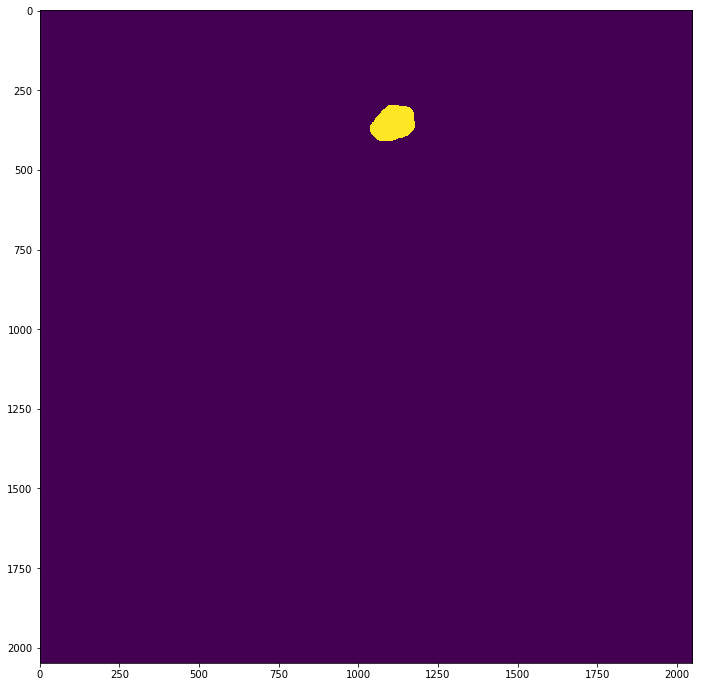

Area of object is 27.879501071451713 µm**2.


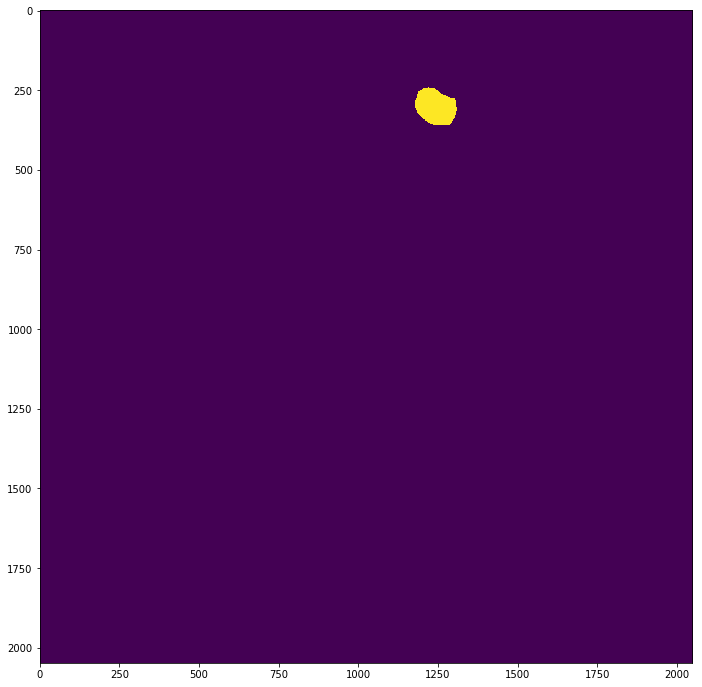

Area of object is 38.66064199211565 µm**2.


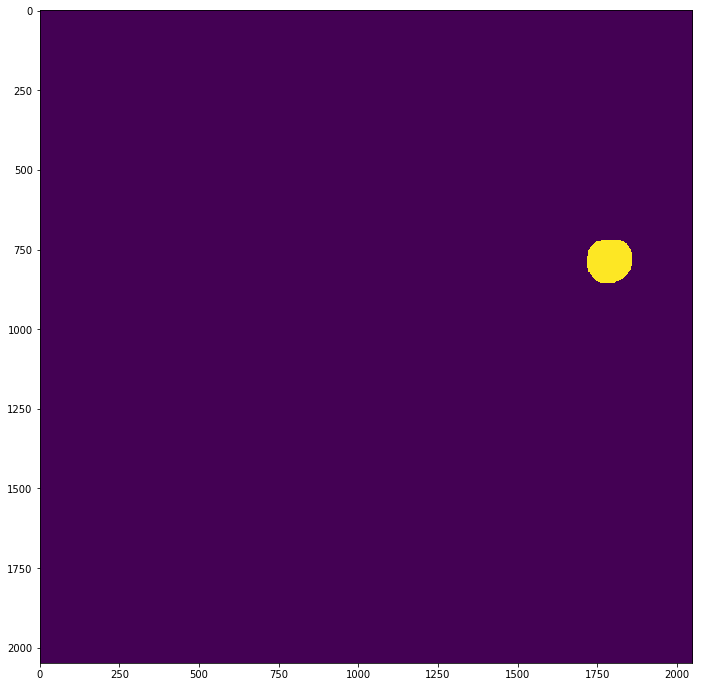

Area of object is 26.26624429041459 µm**2.


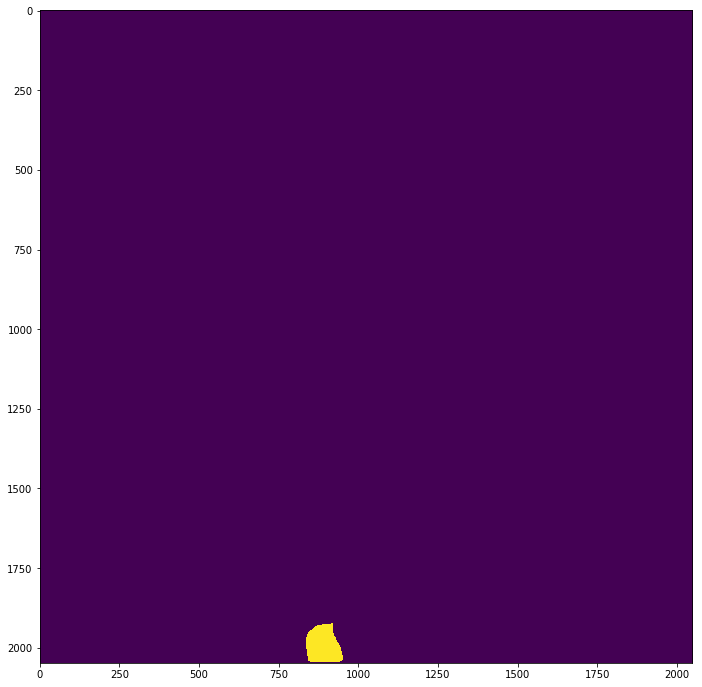

Area of object is 40.465361229472876 µm**2.


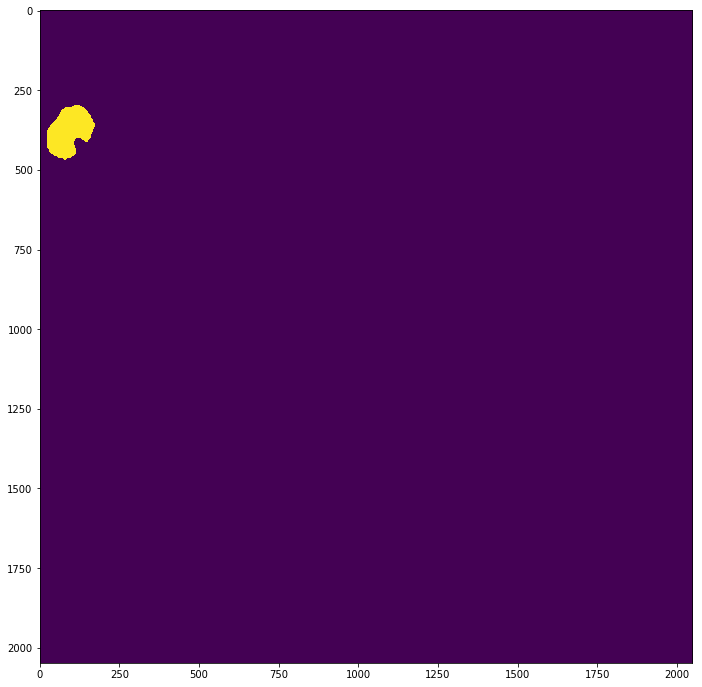

Area of object is 4.06907602398322 µm**2.


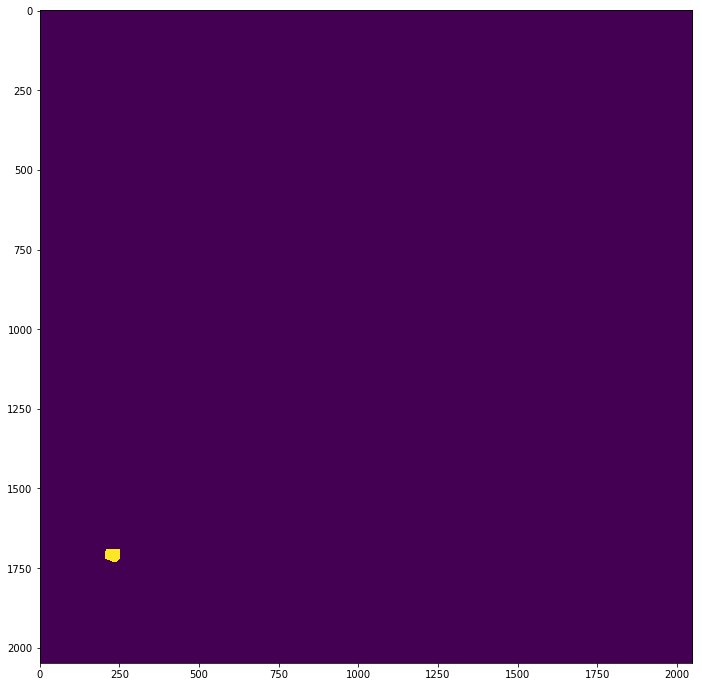

Nummber of objects within the threshold: 12


In [50]:
list_masks = vars(predictions)['extra_fields']['mask']

# all objects
print(len(list_masks))

# lets specify the area of the image in µm**2
area_whole_image = 100*100

# set size threshold in µm**2
size_threshold_min = 25
size_threshold_max = 45

# count of objects within the threshold
count = 0

# iterate through the list of masks
for mask in list_masks:
    numpy_mask = mask.numpy().transpose(1,2,0)
    numpy_mask = np.squeeze(numpy_mask, axis=2)

    # get the counts of object-positive pixels
    unique, counts = np.unique(numpy_mask, return_counts=True)
    
    fraction_object = counts[1]/counts[0]
    size_object = area_whole_image * fraction_object
    print("Area of object is {} µm**2.".format(size_object))
    
    if size_object < size_threshold_max and size_object > size_threshold_min:
        count += 1
        
    # plot the mask
    plt.imshow(numpy_mask)
    plt.show()

print("Nummber of objects within the threshold: {}".format(count))

In [64]:
# predict for a folder of images
img_path = '/data/proj/smFISH/Simone/test_intron/AMEXP20181106/AMEXP20181106_hyb1/test_run_20181123_AMEXP20181106_hyb1_filtered_png/test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'
save_results = '/data/proj/smFISH/Students/Max_Senftleben/files/results/'
save_independently = save_results + '20190329_test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'

# done on cpu to check if there is a difference in prediction
save_independently_cpu = '/data/proj/smFISH/Students/Max_Senftleben/files/results/20190331_AMEXP20181106_DAPI_filtered_predicted_with_cpu/'

for one_image in os.listdir(img_path):
    print("Image {} is handled.".format(one_image))
    image = load(img_path + one_image)
    
    # normalization ca be applied
    result, predictions = nuclei_detect.run_on_opencv_image(np.add(image, 0))
    img = Image.fromarray(result, 'RGB')
    img.save(save_independently_cpu + one_image[:-4] + '_pred.png')

Image AMEXP20181106_hyb1_DAPI_pos_13.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_8.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_1.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_12.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_14.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_7.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_4.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_3.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_11.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_9.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_6.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_10.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_2.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_5.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_0.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_28.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_27.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_23.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_29.png is handled.
Ima